In [21]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


In [22]:
df = pd.DataFrame(index = G.nodes())

df['Degree'] = G.degree().values()

df['Clustering'] = pd.Series(nx.clustering(G)) # ratio de n° de pares de nodos conectados al nodo evaluado y que estan conectados entre sí

df['DegCent'] = pd.Series(nx.degree_centrality(G))  #ratio de qué nodos tienen más grados del global
df['CloCent'] = pd.Series(nx.closeness_centrality(G, normalized=True)) #ratio de qué nodos estan más cercanos al resto (shortest paths)
df['BtwnCent(k=10)'] = pd.Series(nx.betweenness_centrality(G, #ratio de qué nodos tienen más participación dentro de cada shortest paths 
                                                           normalized=True, endpoints=False, k=10))


df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

df_train = df[df['ManagementSalary'].notnull()]
df_test = df[df['ManagementSalary'].isnull()]

(X,y)=(df_train.drop(['ManagementSalary'],axis=1), df_train['ManagementSalary'])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)



scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.86772486772486768

In [26]:
#dp de minmaxScaler

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.86772486772486768

In [5]:
X_train.head()

,Degree,Clustering,DegCent,CloCent,BtwnCent(k=10),Department
833,9,0.761905,0.008964,0.378965,0.000000e+00,14
48,59,0.328321,0.058765,0.412094,1.427067e-03,10
600,13,0.545455,0.012948,0.355410,1.108891e-05,4
314,52,0.365714,0.051793,0.432376,3.155503e-04,1
535,10,0.488889,0.009960,0.360851,1.956867e-07,9


In [6]:
X_test.iloc[:,2].values.transpose() 

array([ 0.00498008,  0.00199203,  0.00896414,  0.04083665,  0.05478088,
        0.03984064,  0.02589641,  0.04681275,  0.01294821,  0.08565737,
        0.07370518,  0.08366534,  0.01195219,  0.07370518,  0.05079681,
        0.03685259,  0.01394422,  0.01992032,  0.00199203,  0.00398406,
        0.04581673,  0.02988048,  0.01693227,  0.10258964,  0.07968127,
        0.00199203,  0.00199203,  0.0059761 ,  0.02390438,  0.02290837,
        0.00099602,  0.02091633,  0.0189243 ,  0.0059761 ,  0.16334661,
        0.04183267,  0.05776892,  0.10059761,  0.0438247 ,  0.05179283,
        0.01792829,  0.03286853,  0.00099602,  0.04780876,  0.03585657,
        0.0059761 ,  0.01294821,  0.02888446,  0.07071713,  0.0249004 ,
        0.01095618,  0.03087649,  0.07370518,  0.02390438,  0.03984064,
        0.00199203,  0.01693227,  0.05278884,  0.00099602,  0.03087649,
        0.01095618,  0.03984064,  0.00099602,  0.03386454,  0.00298805,
        0.00498008,  0.00896414,  0.00796813,  0.00896414,  0.10

In [7]:
X_test.shape[0] != y_test.shape[0]

False

In [19]:
X_train.iloc[:,1:3].head()

,Clustering,DegCent
833,0.761905,0.008964
48,0.328321,0.058765
600,0.545455,0.012948
314,0.365714,0.051793
535,0.488889,0.009960


In [9]:
np.shape(X_train.iloc[:,2].values.reshape(1, -1))

(1, 564)

In [10]:
np.shape(y_train.values)

(564,)

In [ ]:
from adspy_shared_utilities import plot_two_class_knn

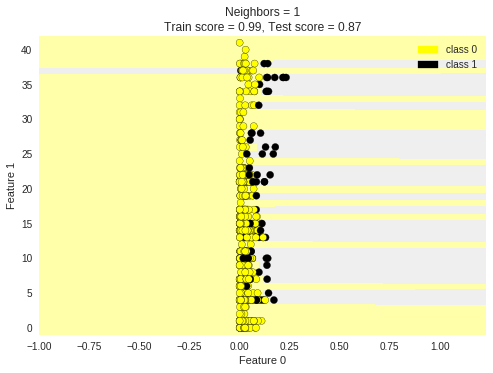

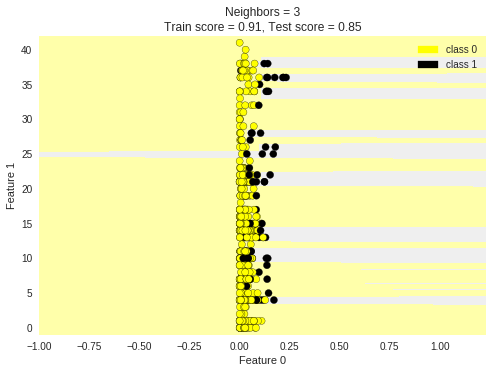

In [17]:
# Department (feature 1) y DegCent

plot_two_class_knn(X_train.iloc[:,(2,5)].values, y_train.values, 1, 'uniform', X_test.iloc[:,(2,5)].values, y_test.values)
plot_two_class_knn(X_train.iloc[:,(2,5)].values, y_train.values, 3, 'uniform', X_test.iloc[:,(2,5)].values, y_test.values)
# plot_two_class_knn(X_train.iloc[:,0:2].values, y_train.values, 11, 'uniform', X_test.iloc[:,0:2].values, y_test.values)

## Siguiente: mismo código de antes pero con MinMaxScaler, no cambia en absoluto

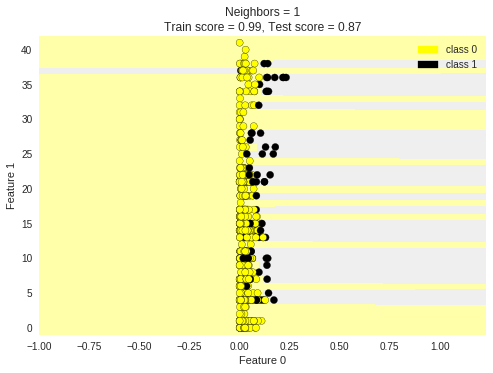

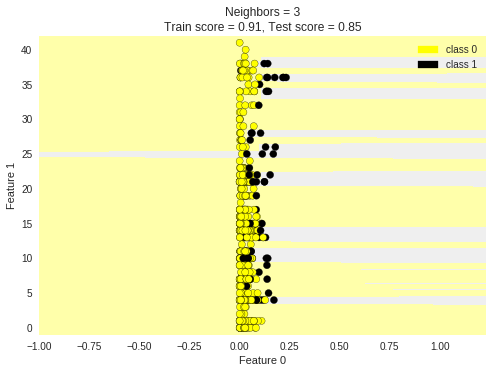

In [27]:
# Department (feature 1) y DegCent

plot_two_class_knn(X_train.iloc[:,(2,5)].values, y_train.values, 1, 'uniform', X_test.iloc[:,(2,5)].values, y_test.values)
plot_two_class_knn(X_train.iloc[:,(2,5)].values, y_train.values, 3, 'uniform', X_test.iloc[:,(2,5)].values, y_test.values)
# plot_two_class_knn(X_train.iloc[:,0:2].values, y_train.values, 11, 'uniform', X_test.iloc[:,0:2].values, y_test.values)

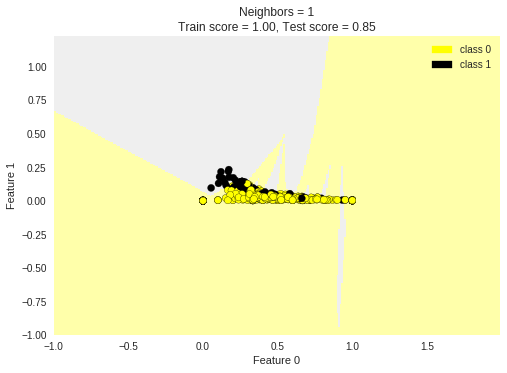

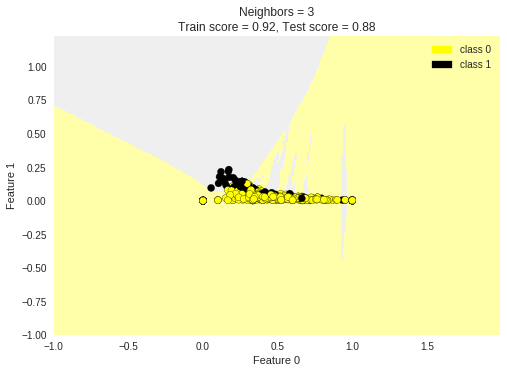

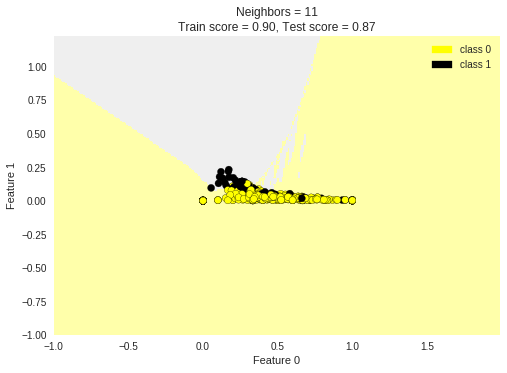

In [11]:
plot_two_class_knn(X_train.iloc[:,1:3].values, y_train.values, 1, 'uniform', X_test.iloc[:,1:3].values, y_test.values)
plot_two_class_knn(X_train.iloc[:,1:3].values, y_train.values, 3, 'uniform', X_test.iloc[:,1:3].values, y_test.values)
plot_two_class_knn(X_train.iloc[:,1:3].values, y_train.values, 11, 'uniform', X_test.iloc[:,1:3].values, y_test.values)

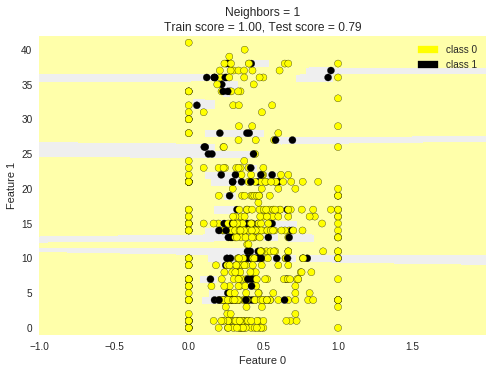

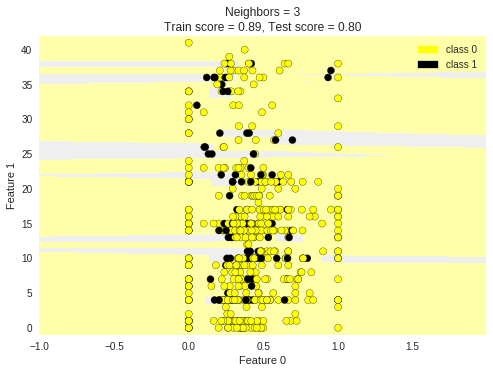

In [18]:
plot_two_class_knn(X_train.iloc[:,(1,5)].values, y_train.values, 1, 'uniform', X_test.iloc[:,(1,5)].values, y_test.values)
plot_two_class_knn(X_train.iloc[:,(1,5)].values, y_train.values, 3, 'uniform', X_test.iloc[:,(1,5)].values, y_test.values)
# plot_two_class_knn(X_train.iloc[:,0:2].values, y_train.values, 11, 'uniform', X_test.iloc[:,0:2].values, y_test.values)

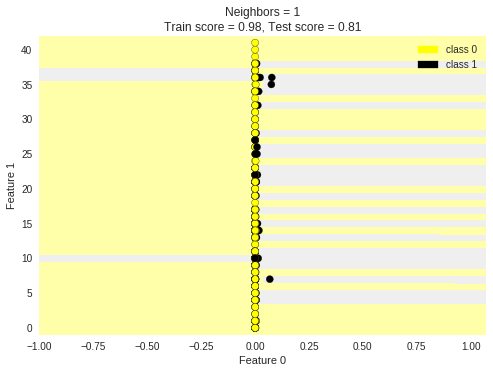

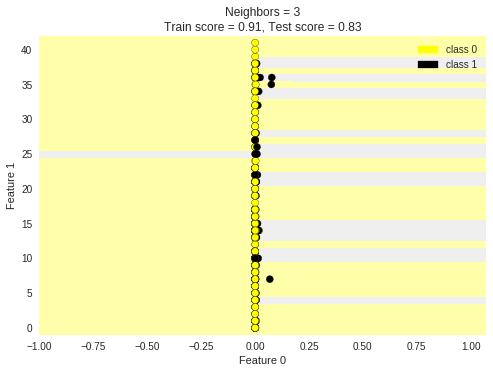

In [20]:
# Department (feature 1) y betweencent

plot_two_class_knn(X_train.iloc[:,(4,5)].values, y_train.values, 1, 'uniform', X_test.iloc[:,(4,5)].values, y_test.values)
plot_two_class_knn(X_train.iloc[:,(4,5)].values, y_train.values, 3, 'uniform', X_test.iloc[:,(4,5)].values, y_test.values)
# plot_two_class_knn(X_train.iloc[:,0:2].values, y_train.values, 11, 'uniform', X_test.iloc[:,0:2].values, y_test.values)